# BIKE SHARE NAVIGATE SPEEDY SUCCESS

### Import Libraries

In [6]:
import pandas as pd

## PREPARE

### Loading Divvy Bike Trip Data (March 2021 - February 2022)

In [5]:
# import all data from first month to the last month 
bikes_1 = pd.read_csv("202103-divvy-tripdata.csv")
bikes_2 = pd.read_csv("202104-divvy-tripdata.csv")
bikes_6 = pd.read_csv("202105-divvy-tripdata.csv")
bikes_3 = pd.read_csv("202106-divvy-tripdata.csv")
bikes_4 = pd.read_csv("202107-divvy-tripdata.csv")
bikes_5 = pd.read_csv("202108-divvy-tripdata.csv")
bikes_6 = pd.read_csv("202109-divvy-tripdata.csv")
bikes_7= pd.read_csv("202110-divvy-tripdata.csv")
bikes_8 = pd.read_csv("202111-divvy-tripdata.csv")
bikes_9 = pd.read_csv("202112-divvy-tripdata.csv")
bikes_10 = pd.read_csv("202201-divvy-tripdata.csv")
bikes_11 = pd.read_csv("202202-divvy-tripdata.csv")

### Exploring the Dimensions of the Dataframes

In [7]:
print(bikes_1.shape)
print(bikes_2.shape)
print(bikes_3.shape)
print(bikes_4.shape)
print(bikes_5.shape)
print(bikes_6.shape)
print(bikes_7.shape)
print(bikes_8.shape)
print(bikes_9.shape)
print(bikes_10.shape)
print(bikes_11.shape)

(228496, 13)
(337230, 13)
(729595, 13)
(822410, 13)
(804352, 13)
(756147, 13)
(631226, 13)
(359978, 13)
(247540, 13)
(103770, 13)
(115609, 13)


###  Aggregating Divvy Bike Trip Data: Total Rows Across Monthly Datasets

In [8]:
total_bike_trips = sum(len(df) for df in [bikes_1, bikes_2, bikes_3, bikes_4, bikes_5, bikes_6, bikes_7, bikes_8, bikes_9, bikes_10, bikes_11])
print("Total Bike Trips Across Months: ", total_bike_trips)

Total Bike Trips Across Months:  5136353


### Concatenating Monthly Divvy Bike Trip Dataframes

In [9]:
df_bikes = pd.concat([bikes_1, bikes_2, bikes_3, bikes_4, bikes_5, bikes_6, bikes_7, bikes_8, bikes_9, bikes_10, bikes_11], ignore_index=True)

### Evaluating the Shape of the Concatenated Divvy Bike Trip DataFrame

In [10]:
print("Shape of Concatenated DataFrame: ", df_bikes.shape)

Shape of Concatenated DataFrame:  (5136353, 13)


### Analyzing Comprehensive Information of the Concatenated Divvy Bike Trip DataFrame

In [11]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136353 entries, 0 to 5136352
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 509.4+ MB


## PROCESS

### Data Cleaning: Handling Duplicates and Null Values in the Concatenated Divvy Bike Trip DataFrame

In [12]:
duplicates = df_bikes.duplicated().sum()
print("Number of Duplicate Rows: ", duplicates)

Number of Duplicate Rows:  0


In [13]:
null_values = df_bikes.isnull().sum()
print("\nNumber of Null Values Before Removal:")
print(null_values)


Number of Null Values Before Removal:
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    659234
start_station_id      659231
end_station_name      703623
end_station_id        703623
start_lat                  0
start_lng                  0
end_lat                 4165
end_lng                 4165
member_casual              0
dtype: int64


In [14]:
df_bikes.dropna(inplace=True)

null_values = df_bikes.isnull().sum()
print("\nNumber of Null Values After Removal:")
print(null_values)


Number of Null Values After Removal:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


### Summarizing Descriptive Statistics After Data Cleaning

In [15]:
print("\nDescriptive Statistics After Cleaning:")
print(df_bikes.describe())


Descriptive Statistics After Cleaning:
          start_lat     start_lng       end_lat       end_lng
count  4.180109e+06  4.180109e+06  4.180109e+06  4.180109e+06
mean   4.190291e+01 -8.764365e+01  4.190319e+01 -8.764389e+01
std    4.040932e-02  2.425537e-02  4.053278e-02  2.350797e-02
min    4.164850e+01 -8.783000e+01  4.164850e+01 -8.783000e+01
25%    4.188213e+01 -8.765552e+01  4.188224e+01 -8.765651e+01
50%    4.189766e+01 -8.764098e+01  4.189785e+01 -8.764107e+01
75%    4.192628e+01 -8.762775e+01  4.192669e+01 -8.762775e+01
max    4.563503e+01 -7.379648e+01  4.216812e+01 -8.752740e+01


### Converting Timestamps to Datetime Format

In [16]:
df_bikes['started_at'] = pd.to_datetime(df_bikes['started_at'])
df_bikes['ended_at'] = pd.to_datetime(df_bikes['ended_at'])

### Extracting Date and time components

In [17]:
df_bikes['day_of_week'] = df_bikes['started_at'].dt.day_name()
df_bikes['month'] = df_bikes['started_at'].dt.month_name()
df_bikes['hour'] = df_bikes['started_at'].dt.hour
df_bikes['trip_duration_minutes'] = (df_bikes['ended_at'] - df_bikes['started_at']).dt.total_seconds() / 60

### Overview After Date Conversion: Data Types and Initial Data Preview

In [18]:
print("\nData Types and Structure After Date Conversion:")
print(df_bikes.info())


Data Types and Structure After Date Conversion:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4180109 entries, 0 to 5136350
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ride_id                object        
 1   rideable_type          object        
 2   started_at             datetime64[ns]
 3   ended_at               datetime64[ns]
 4   start_station_name     object        
 5   start_station_id       object        
 6   end_station_name       object        
 7   end_station_id         object        
 8   start_lat              float64       
 9   start_lng              float64       
 10  end_lat                float64       
 11  end_lng                float64       
 12  member_casual          object        
 13  day_of_week            object        
 14  month                  object        
 15  hour                   int64         
 16  trip_duration_minutes  float64       
dtypes: datetime64[ns

In [19]:
print("\nFirst Few Rows of DataFrame:")
df_bikes.head()


First Few Rows of DataFrame:


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,month,hour,trip_duration_minutes
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,Tuesday,March,8,4.066667
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,Sunday,March,1,10.450000
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,Thursday,March,21,16.400000
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,Thursday,March,13,28.983333
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,Sunday,March,9,17.933333


## ANALYZE

The marketing team aims to propose a new strategy to convert casual riders into annual members. However, before seeking executive approval, it is imperative to substantiate recommendations with robust data insights and professional visualizations.

In [20]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Calculating and Analyzing Ride Durations

In [21]:
average_duration = df_bikes['trip_duration_minutes'].mean()
maximum_duration_days = round(df_bikes['trip_duration_minutes'].max() / 60 / 24)

print(average_duration)
print(maximum_duration_days)

21.09846672259823
39


Observations:

The average duration of rides is calculated to be approximately 21 minutes.
The maximum duration of rides is observed to be approximately 39 days.

### Analyzing Rider Composition

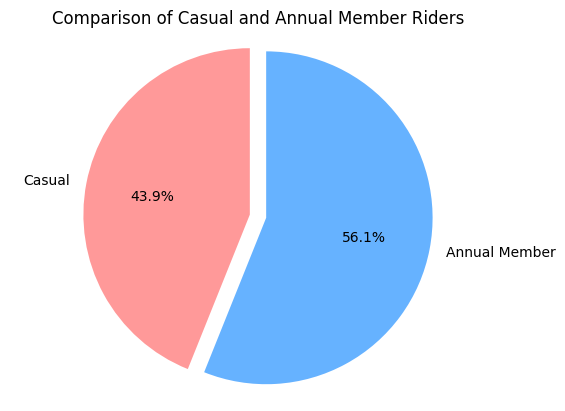

In [22]:
percentage_casual = (df_bikes['member_casual'].value_counts(normalize=True) * 100)['casual']
percentage_member = (df_bikes['member_casual'].value_counts(normalize=True) * 100)['member']

labels = ['Casual', 'Annual Member']
sizes = [percentage_casual, percentage_member]
colors = ['#FF9999', '#66B2FF']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Comparison of Casual and Annual Member Riders')
plt.show()

Observations:

The pie chart provides a visual representation of the rider composition, with 'Casual' and 'Annual Member' segments.
Approximately 43.9% of riders fall under the 'Casual' category, while 56.1% are identified as 'Annual Members'.

### Comparison of Most Common Riding Days for Casual Riders and Annual Members

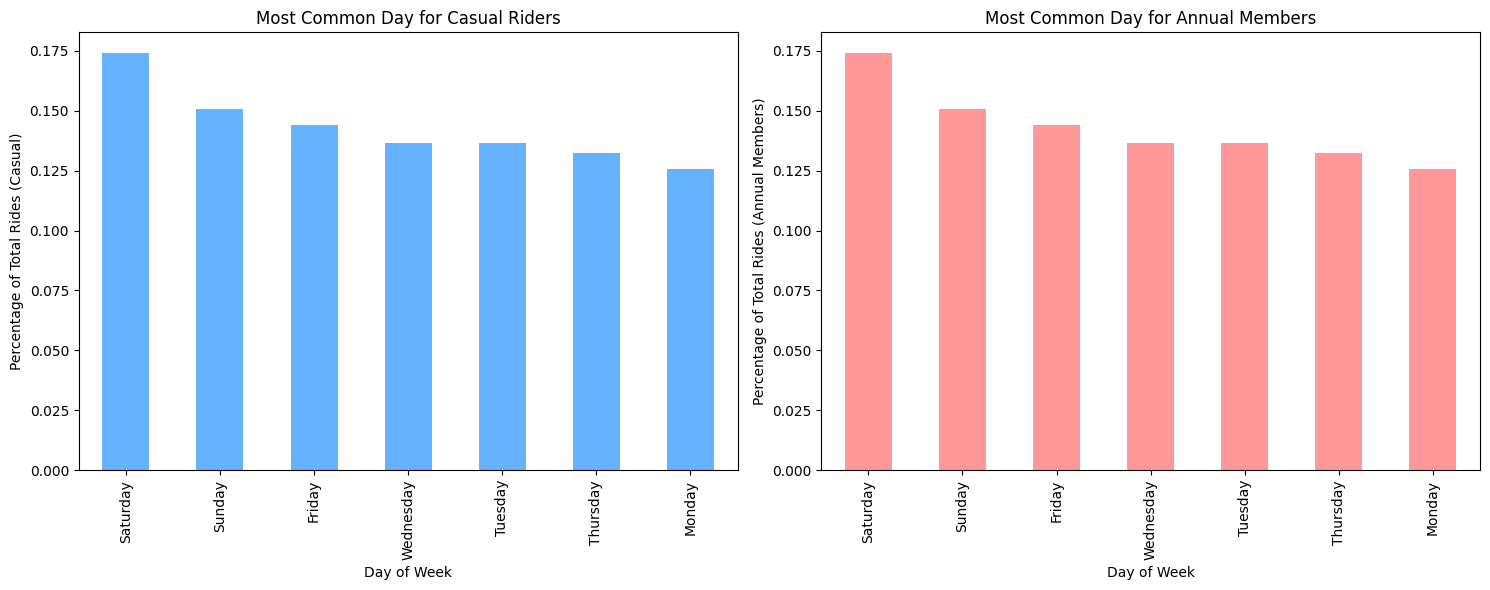

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

(df_bikes['day_of_week'].value_counts() / df_bikes.shape[0]).plot(kind='bar', ax=axes[0], color='#66B2FF')
axes[0].set_title('Most Common Day for Casual Riders')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Percentage of Total Rides (Casual)')

(df_bikes['day_of_week'].value_counts() / df_bikes.shape[0]).plot(kind='bar', ax=axes[1], color='#FF9999')
axes[1].set_title('Most Common Day for Annual Members')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Percentage of Total Rides (Annual Members)')

plt.tight_layout()
plt.show()

Observations:

Casual riders tend to take longer trips on weekends. In contrast, members have their longest rides on weekdays. Additionally, the trip duration for members stays more consistent, showing less variation compared to casual riders.

### Comparison of Average Ride Time between Casual and Member Clients

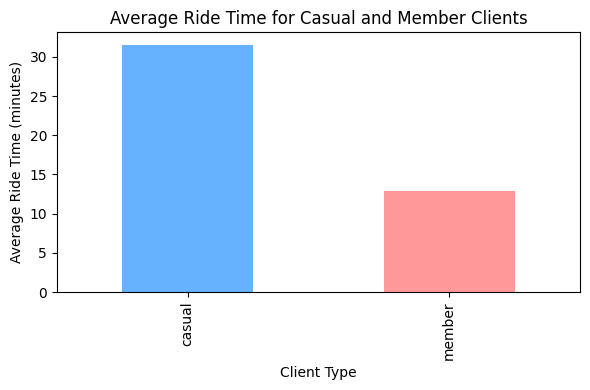

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

df_bikes.groupby('member_casual')['trip_duration_minutes'].mean().plot(kind='bar', color=['#66B2FF', '#FF9999'])
plt.title('Average Ride Time for Casual and Member Clients')
plt.xlabel('Client Type')
plt.ylabel('Average Ride Time (minutes)')

plt.tight_layout()
plt.show()

Observations:

Casual clients, on average, have longer ride durations compared to member clients.

### Rideable Type Preference for Casual and Member Clients

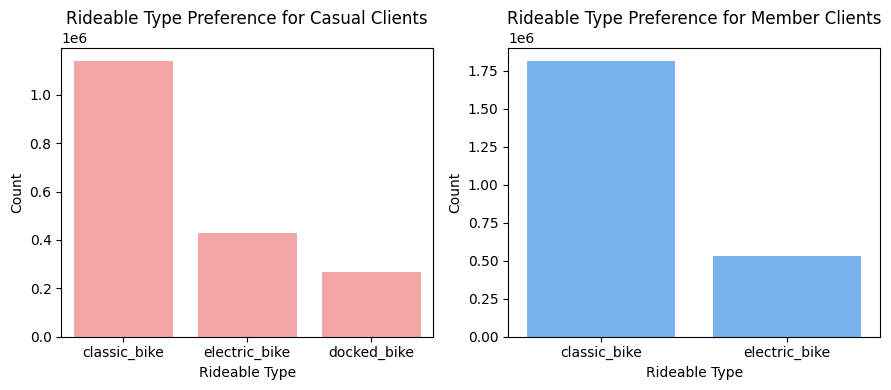

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.countplot(x='rideable_type', data=df_bikes[df_bikes['member_casual'] == 'casual'], ax=axes[0], color='#FF9999')
axes[0].set_title('Rideable Type Preference for Casual Clients')
axes[0].set_xlabel('Rideable Type')
axes[0].set_ylabel('Count')

sns.countplot(x='rideable_type', data=df_bikes[df_bikes['member_casual'] == 'member'], ax=axes[1], color='#66B2FF')
axes[1].set_title('Rideable Type Preference for Member Clients')
axes[1].set_xlabel('Rideable Type')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Observations:

Most riders, whether casual or members, prefer using classic bikes, followed by electric bikes. Members seldom use docked bikes, and casual riders also use them less frequently compared to classic and electric bikes.

### Monthly Distribution of Rides for Casual Riders and Annual Members

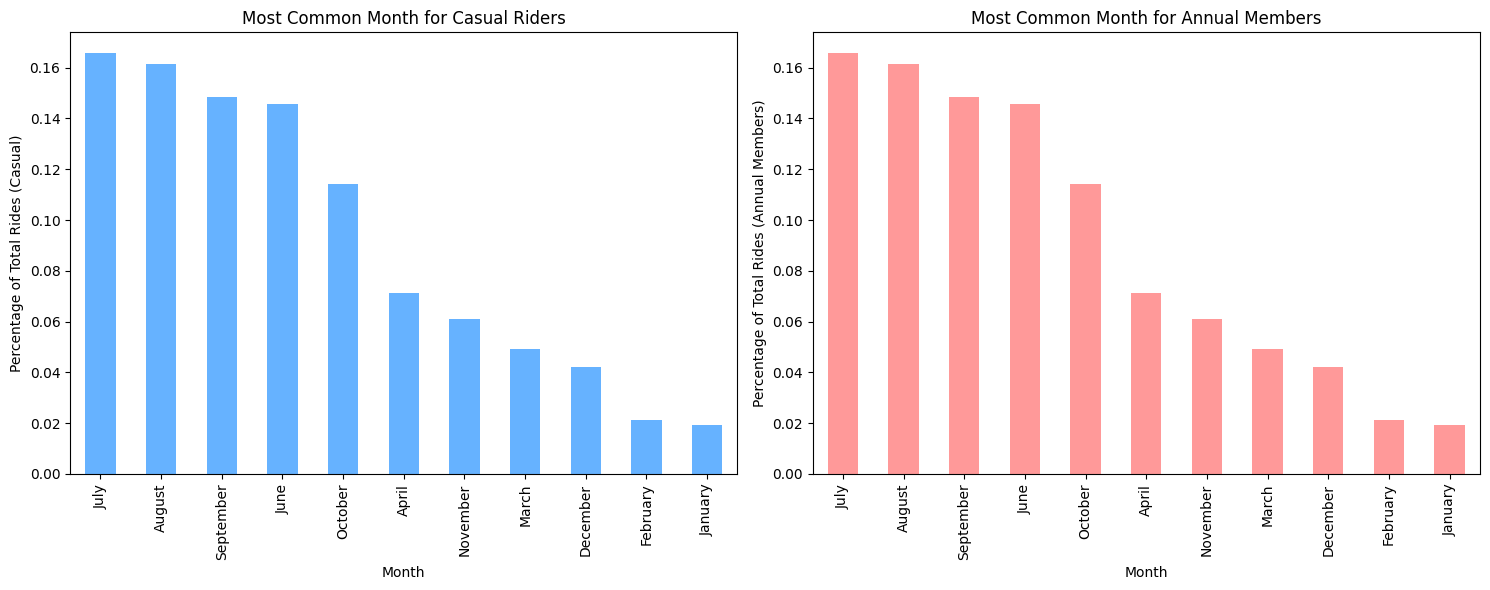

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

(df_bikes['month'].value_counts() / df_bikes.shape[0]).plot(kind='bar', ax=axes[0], color='#66B2FF')
axes[0].set_title('Most Common Month for Casual Riders')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Percentage of Total Rides (Casual)')

(df_bikes['month'].value_counts() / df_bikes.shape[0]).plot(kind='bar', ax=axes[1], color='#FF9999')
axes[1].set_title('Most Common Month for Annual Members')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Percentage of Total Rides (Annual Members)')

plt.tight_layout()
plt.show()

Observations:

The charts above display the monthly ride count for both client types, revealing a decrease in the number of rides and average ride duration during colder months. This decline could be attributed to unfavorable weather conditions, prompting individuals to opt for indoor activities or alternative modes of transportation.

### Hourly Distribution of Rides for Casual Riders and Annual Members

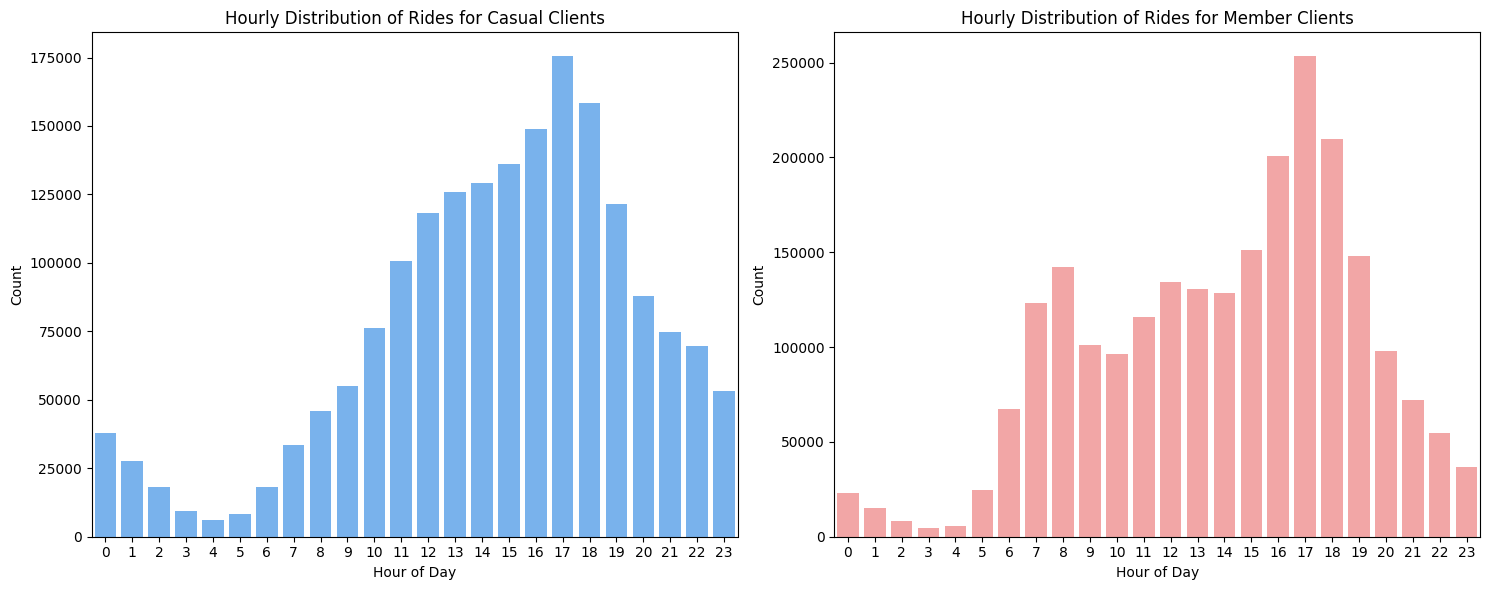

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='hour', data=df_bikes[df_bikes['member_casual'] == 'casual'], ax=axes[0], color='#66B2FF')
axes[0].set_title('Hourly Distribution of Rides for Casual Clients')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Count')

sns.countplot(x='hour', data=df_bikes[df_bikes['member_casual'] == 'member'], ax=axes[1], color='#FF9999')
axes[1].set_title('Hourly Distribution of Rides for Member Clients')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Observations:

The analysis reveals that, irrespective of client type, the majority of rides occur during the second half of the day. Furthermore, the peak number of rides is observed around 5 pm.

### Top Five Start and End Stations for Rides

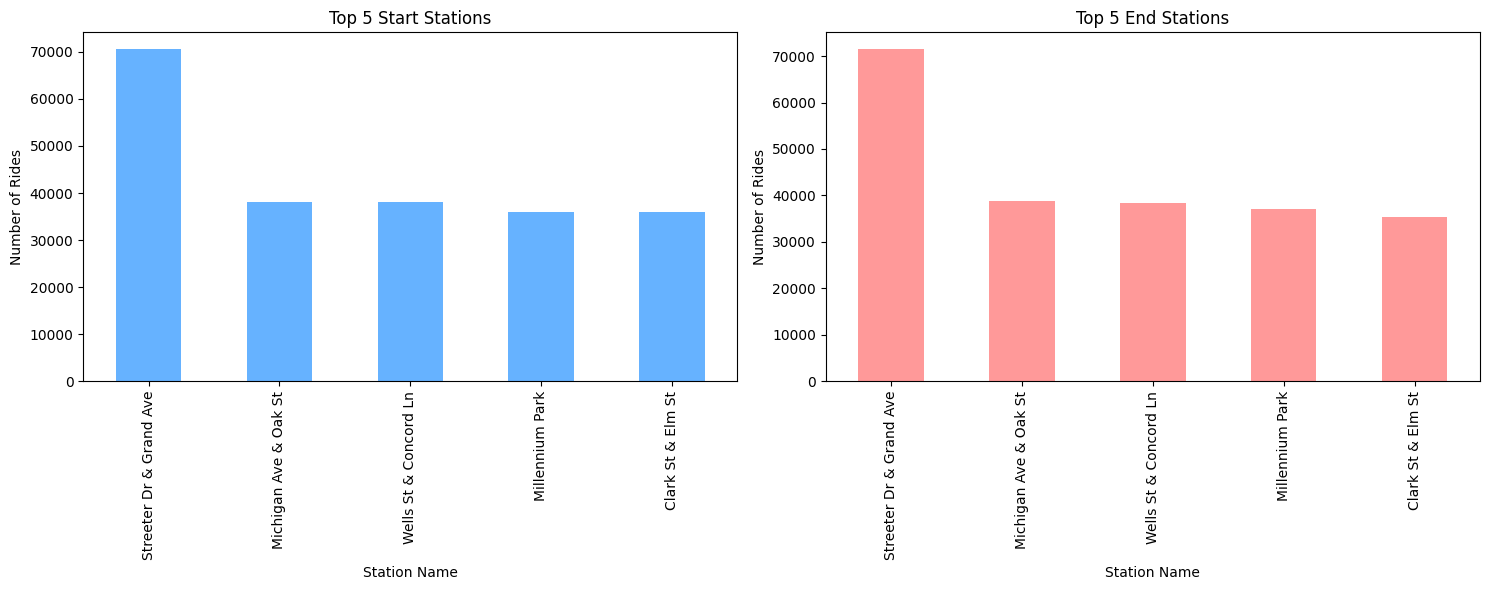

In [30]:
top_start_stations = df_bikes['start_station_name'].value_counts().head(5)

top_end_stations = df_bikes['end_station_name'].value_counts().head(5)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

top_start_stations.plot(kind='bar', ax=axes[0], color='#66B2FF')
axes[0].set_title('Top 5 Start Stations')
axes[0].set_xlabel('Station Name')
axes[0].set_ylabel('Number of Rides')

top_end_stations.plot(kind='bar', ax=axes[1], color='#FF9999')
axes[1].set_title('Top 5 End Stations')
axes[1].set_xlabel('Station Name')
axes[1].set_ylabel('Number of Rides')

plt.tight_layout()
plt.show()


Observations:

These stations rank among the top five in terms of usage and could serve as promising locations for initiating new schemes and promotions.

## ACT

Recommendations

We can offer special incentives and discounts to encourage casual members to transition into annual members, especially during weekends and the summer season. Implementing higher rental prices for casual rides during weekends could serve as an incentive for them to consider becoming members.

Launching promotional campaigns and offers from the top five stations can be a strategic starting point, and if successful, we can consider expanding these initiatives to other locations. Leveraging the peak activity during the second half of the day would be ideal for client interactions and engagement.